In [1]:
from datetime import datetime as dt
import unicodedata
import pandas as pd
import numpy as np

# Plotting tools 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import scipy.stats as stats
from scipy.stats.stats import pearsonr

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
import string

## Embeddings

We have our data split into monthly data. Now, we compare the embeddings from January 2020 and July 2020.

### Import Data

In [3]:
jan = pd.read_csv('months/jan.csv', lineterminator='\n')
feb = pd.read_csv('months/feb.csv', lineterminator='\n')
mar = pd.read_csv('months/mar.csv', lineterminator='\n')
apr = pd.read_csv('months/apr.csv', lineterminator='\n')
may = pd.read_csv('months/may.csv', lineterminator='\n')
june = pd.read_csv('months/june.csv', lineterminator='\n')
july = pd.read_csv('months/july.csv', lineterminator='\n')

In [4]:
jan.shape, feb.shape, mar.shape, apr.shape, may.shape, june.shape, july.shape

((21102, 5),
 (72057, 5),
 (356982, 5),
 (421719, 5),
 (312505, 5),
 (245143, 5),
 (243827, 5))

We see that we have varying data sizes with February having the largest dataset. To avoid having skewed results due to differing sizes, we take a random sample of the lowest amount of data from each sample. We can see that January has the least amount of data so that is the size we will extract from each month.

In [5]:
n = jan.shape[0]
n

21102

### Resampling Data

In [6]:
feb = feb.sample(n=n, replace=False, random_state=1)
mar = mar.sample(n=n, replace=False, random_state=1)
apr = apr.sample(n=n, replace=False, random_state=1)
may = may.sample(n=n, replace=False, random_state=1)
june = june.sample(n=n, replace=False, random_state=1)
july = july.sample(n=n, replace=False, random_state=1)

### Text Cleaning

First, let's remove all stop words and punctuation from the sentences. Then we will get our embeddings.

In [7]:
stop = set(stopwords.words('english'))
all_stops = stop | set(string.punctuation)

In [8]:
def clean_tokens(sentence):
    temp = []
    for word in word_tokenize(sentence):
        if word not in all_stops:
            temp.append(word.lower())
    return temp

In [9]:
# Tokens
jan_tokens = jan.body.apply(clean_tokens)
feb_tokens = feb.body.apply(clean_tokens)
mar_tokens = mar.body.apply(clean_tokens)
apr_tokens = apr.body.apply(clean_tokens)
may_tokens = may.body.apply(clean_tokens)
june_tokens = june.body.apply(clean_tokens)
july_tokens = july.body.apply(clean_tokens)

In [10]:
jan_tokens.shape, may_tokens.shape, july_tokens.shape

((21102,), (21102,), (21102,))

In [11]:
len(np.concatenate(jan_tokens.values, axis=0))

6046666

We see that for January we have over 6 million tokens.

### Word2Vec Models

We build a word2vec model for January through July tokens to get the embeddings.

In [12]:
# Create a word2vec model for each month
jan_model = gensim.models.Word2Vec(jan_tokens, min_count = 3, window = 5, sg=1) 
feb_model = gensim.models.Word2Vec(feb_tokens, min_count = 3, window = 5, sg=1) 
mar_model = gensim.models.Word2Vec(mar_tokens, min_count = 3, window = 5, sg=1) 
apr_model = gensim.models.Word2Vec(apr_tokens, min_count = 3, window = 5, sg=1) 
may_model = gensim.models.Word2Vec(may_tokens, min_count = 3, window = 5, sg=1) 
june_model = gensim.models.Word2Vec(june_tokens, min_count = 3, window = 5, sg=1) 
july_model = gensim.models.Word2Vec(july_tokens, min_count = 3, window = 5, sg=1)

In [13]:
# Test out embedding on one word
jan_model.wv['apple']

array([ 0.43058535,  0.72101843,  0.5788836 , -0.43341   ,  0.6103891 ,
       -0.9263783 ,  0.959213  ,  0.68388057,  0.08593346,  0.13652928,
        0.26632592, -0.06429579,  0.08384904,  0.01715355,  0.17565955,
       -0.37641475, -0.28535435, -0.498663  ,  0.16144502, -0.35861298,
       -0.1666466 ,  0.8536587 ,  0.53627384, -0.50563097, -0.4053061 ,
        0.13179167,  0.1083571 ,  0.2362305 ,  0.4174406 ,  0.3731908 ,
       -0.02903603,  0.07684115,  0.8267458 ,  0.4151472 ,  0.04798637,
        0.02801921,  0.3683494 , -0.7271027 , -0.6145764 , -0.2537021 ,
       -0.66522855,  0.04356118,  0.50509983,  0.242412  ,  0.6576062 ,
       -0.2375747 , -0.09078398,  0.008487  , -0.6785255 , -0.20745823,
       -0.69696313, -0.40420136, -0.5148108 ,  0.07318664,  0.0228732 ,
        0.21924476,  0.31020945,  0.0950743 , -0.2014623 , -0.6728841 ,
        0.897744  ,  0.596179  ,  0.6253877 ,  0.08707827, -0.38548008,
       -0.21983826,  0.01486751,  0.42383674,  0.1890692 ,  0.28

In [14]:
# Save the embedding models
jan_model.save('models/jan_model.model')
feb_model.save('models/feb_model.model')
mar_model.save('models/mar_model.model')
apr_model.save('models/apr_model.model')
may_model.save('models/may_model.model')
june_model.save('models/june_model.model')
july_model.save('models/july_model.model')

temp to avoid having to re-rerun notebook:

In [15]:
# Create a word2vec model for each month
jan_model = Word2Vec.load("models/jan_model.model")
feb_model = Word2Vec.load("models/feb_model.model")
mar_model = Word2Vec.load("models/mar_model.model")
apr_model = Word2Vec.load("models/apr_model.model")
may_model = Word2Vec.load("models/may_model.model")
june_model = Word2Vec.load("models/june_model.model")
july_model = Word2Vec.load("models/july_model.model")

We save our embedding models so that we can load them in again in the future.

## Group Word Lists 

We need to get word lists for both Asian and White names so that we can separate the two from the articles. We get this information from _Word Embeddings Quantify 100 Years of Gender and Ethnic Stereotypes_.

In [16]:
white_last_names = ['harris', 'nelson', 'robinson', 'thompson', 'moore', 'wright', 'anderson', 'clark', 'jackson', 'taylor', 'scott', 'davis',
'allen', 'adams', 'lewis', 'williams', 'jones', 'wilson', 'martin', 'johnson']

len(white_last_names)

20

In [17]:
chinese_last_names = ['chung', 'liu', 'wong', 'huang', 'ng','hu', 'chu', 'chen', 'lin', 'liang', 'wang', 'wu', 'yang', 'tang', 'chang', 'hong', 'li']
asian_last_names = ['cho', 'wong', 'tang', 'huang', 'chu', 'chung', 'ng', 'wu', 'liu', 'chen', 'lin', 'yang', 'kim', 'chang', 'shah', 'wang', 'li', 'khan',
'singh', 'hong'] + chinese_last_names

# Get unique last names to avoid any repeats
asian_last_names = np.unique(np.array(asian_last_names))

asian_last_names.shape

(22,)

We have 20 White last names and 22 Asian last names.

**White Last Names**

In [18]:
# Get embedding for every word
whiteEmb_jan = np.array([jan_model.wv[name] for name in white_last_names])
whiteEmb_feb = np.array([feb_model.wv[name] for name in white_last_names])
whiteEmb_mar = np.array([mar_model.wv[name] for name in white_last_names])
whiteEmb_apr = np.array([apr_model.wv[name] for name in white_last_names])
whiteEmb_may = np.array([may_model.wv[name] for name in white_last_names])
whiteEmb_june = np.array([june_model.wv[name] for name in white_last_names])
whiteEmb_july = np.array([july_model.wv[name] for name in white_last_names])

whiteEmb_jan.shape

(20, 100)

Then, we repeat this process with Asian last names.

**Asian Last Names**

In [19]:
# Get embedding for every word
asianEmb_jan = np.array([jan_model.wv[name] for name in asian_last_names])
asianEmb_feb = np.array([feb_model.wv[name] for name in asian_last_names])
asianEmb_mar = np.array([mar_model.wv[name] for name in asian_last_names])
asianEmb_apr = np.array([apr_model.wv[name] for name in asian_last_names])
asianEmb_may = np.array([may_model.wv[name] for name in asian_last_names])
asianEmb_june = np.array([june_model.wv[name] for name in asian_last_names])
asianEmb_july = np.array([july_model.wv[name] for name in asian_last_names])

asianEmb_jan.shape

(22, 100)

## Other Word Lists

From reading articles and the following papers, the following categories for word lists have been created. We will be quantifying the association between Asians (relative to Whites) for:
1. COVID-19 related terms
2. Hate Crime related terms
3. Outsider Adjectives
4. General list of adjectives

The first three will be used to determine if they follow global events, i.e. reports from news articles and papers on the effects of COVID-19 in. The latter will then be used with a sentiment analysis to determine if more negative adjectives are being associated with Asians vs. Whites if time persists. 

We read these word lists in from a self-created CSV file. We get oustider adjectives and the larger adjective list from [1].

https://www.pbs.org/newshour/nation/asian-americans-describe-gut-punch-of-racist-attacks-during-coronavirus-pandemic
https://www.frontiersin.org/articles/10.3389/fcomm.2020.00039/full

In [20]:
word_lists = pd.read_csv('data/wordlists.csv')
word_lists.head()

,covid,hate_crime,outsider
0,coronavirus,harassment,devious
1,virus,assault,bizarre
2,covid,murder,venomous
3,flu,arson,erratic
4,bat,vandalism,barbaric


In [21]:
covid = word_lists.covid.values
hate_crime = word_lists.hate_crime.values
outsider = word_lists.outsider.values

First, we want to determine words that are present in all of the months as these are the only embeddings that we can compare over time.

**Check which words are in all of the months**

In [22]:
jan_words = jan_model.wv.key_to_index
feb_words = feb_model.wv.key_to_index
mar_words = mar_model.wv.key_to_index
apr_words = apr_model.wv.key_to_index
may_words = may_model.wv.key_to_index
june_words = june_model.wv.key_to_index
july_words = july_model.wv.key_to_index

In [23]:
def check_words(lst):
    final_lst = []
    for word in lst:
        if (word in jan_words) & (word in feb_words) & (word in mar_words) & (word in apr_words) & (word in may_words) & (word in june_words) & (word in july_words):
            final_lst.append(word)
    return final_lst

In [24]:
covid_lst = check_words(covid)
hate_lst = check_words(hate_crime)
outsider_lst = check_words(outsider)

In [25]:
print(covid_lst)
print(hate_lst)
print(outsider_lst)

['coronavirus', 'virus', 'flu', 'bat', 'sick', 'disease', 'infectious', 'contagious']
['assault', 'murder', 'arson', 'vandalism', 'threats', 'hate', 'spitting', 'attack']
['bizarre', 'erratic', 'frightening', 'forceful', 'deceptive', 'greedy', 'hateful', 'brutal', 'monstrous', 'calculating', 'cruel', 'aggressive', 'monstrous']


In [26]:
len(covid_lst), len(hate_lst), len(outsider_lst)

(8, 8, 13)

These are the words that appear in every month of data. Next, we get the embeddings for each of these words.

## Embeddings

In [27]:
def get_embeddings(lst, model):
    emb_lst = []
    for word in lst:
        embs = []
        emb = model.wv[word]
        emb_lst.append(emb)
    return emb_lst

**COVID**

In [28]:
# January
covidEmb_jan = np.array(get_embeddings(covid_lst, jan_model))
hateEmb_jan = np.array(get_embeddings(hate_lst, jan_model))
outsiderEmb_jan = np.array(get_embeddings(outsider_lst, jan_model))

# February
covidEmb_feb = np.array(get_embeddings(covid_lst, feb_model))
hateEmb_feb = np.array(get_embeddings(hate_lst, feb_model))
outsiderEmb_feb = np.array(get_embeddings(outsider_lst, feb_model))

# March
covidEmb_mar = np.array(get_embeddings(covid_lst, mar_model))
hateEmb_mar = np.array(get_embeddings(hate_lst, mar_model))
outsiderEmb_mar = np.array(get_embeddings(outsider_lst, mar_model))

# April
covidEmb_apr = np.array(get_embeddings(covid_lst, apr_model))
hateEmb_apr = np.array(get_embeddings(hate_lst, apr_model))
outsiderEmb_apr = np.array(get_embeddings(outsider_lst, apr_model))

# May
covidEmb_may = np.array(get_embeddings(covid_lst, may_model))
hateEmb_may = np.array(get_embeddings(hate_lst, may_model))
outsiderEmb_may = np.array(get_embeddings(outsider_lst, may_model))

# June
covidEmb_june = np.array(get_embeddings(covid_lst, june_model))
hateEmb_june = np.array(get_embeddings(hate_lst, june_model))
outsiderEmb_june = np.array(get_embeddings(outsider_lst, june_model))

# July
covidEmb_july = np.array(get_embeddings(covid_lst, july_model))
hateEmb_july = np.array(get_embeddings(hate_lst, july_model))
outsiderEmb_july = np.array(get_embeddings(outsider_lst, july_model))

We then want to get the group representational vectors for each category for each month.

In [29]:
# January
covidGroup_jan = np.mean(covidEmb_jan, axis=0)
hateGroup_jan = np.mean(hateEmb_jan, axis=0)
outsiderGroup_jan = np.mean(outsiderEmb_jan, axis=0)

# February
covidGroup_feb = np.mean(covidEmb_feb, axis=0)
hateGroup_feb = np.mean(hateEmb_feb, axis=0)
outsiderGroup_feb = np.mean(outsiderEmb_feb, axis=0)

# March
covidGroup_mar = np.mean(covidEmb_mar, axis=0)
hateGroup_mar = np.mean(hateEmb_mar, axis=0)
outsiderGroup_mar = np.mean(outsiderEmb_mar, axis=0)

# April
covidGroup_apr = np.mean(covidEmb_apr, axis=0)
hateGroup_apr = np.mean(hateEmb_apr, axis=0)
outsiderGroup_apr = np.mean(outsiderEmb_apr, axis=0)

# May
covidGroup_may = np.mean(covidEmb_may, axis=0)
hateGroup_may = np.mean(hateEmb_may, axis=0)
outsiderGroup_may = np.mean(outsiderEmb_may, axis=0)

# June
covidGroup_june = np.mean(covidEmb_june, axis=0)
hateGroup_june = np.mean(hateEmb_june, axis=0)
outsiderGroup_june = np.mean(outsiderEmb_june, axis=0)

# July
covidGroup_july = np.mean(covidEmb_july, axis=0)
hateGroup_july = np.mean(hateEmb_july, axis=0)
outsiderGroup_july = np.mean(outsiderEmb_july, axis=0)

## Embedding Similarity
Now, for each of these words, we can compute the association with the Asian and White last names and the generalized category vectors.

### COVID

In [30]:
# Bias with Asian vector
covidAsian_jan = np.linalg.norm(covidGroup_jan - asianEmb_jan, axis=1)
covidAsian_feb = np.linalg.norm(covidGroup_feb - asianEmb_feb, axis=1)
covidAsian_mar = np.linalg.norm(covidGroup_mar - asianEmb_mar, axis=1)
covidAsian_apr = np.linalg.norm(covidGroup_apr - asianEmb_apr, axis=1)
covidAsian_may = np.linalg.norm(covidGroup_may - asianEmb_may, axis=1)
covidAsian_june = np.linalg.norm(covidGroup_june - asianEmb_june, axis=1)
covidAsian_july = np.linalg.norm(covidGroup_july - asianEmb_july, axis=1)

In [31]:
covidAsian = np.array([covidAsian_jan, covidAsian_feb, covidAsian_mar, covidAsian_apr, covidAsian_may, 
                       covidAsian_june, covidAsian_july])

In [32]:
# Average similarity 
np.mean(covidAsian, axis=1)

array([3.6984904, 3.680052 , 3.058544 , 3.0748506, 3.2939675, 3.3023984,
       3.4255655], dtype=float32)

In [33]:
# Deviation between months 
np.sqrt(np.var(covidAsian,axis=1))

array([0.46853206, 0.36826992, 0.5542214 , 0.67906713, 0.6259921 ,
       0.6333466 , 0.53371936], dtype=float32)

In [34]:
# Bias with White vector
covidWhite_jan = np.linalg.norm(covidGroup_jan - whiteEmb_jan, axis=1)
covidWhite_feb = np.linalg.norm(covidGroup_feb - whiteEmb_feb, axis=1)
covidWhite_mar = np.linalg.norm(covidGroup_mar - whiteEmb_mar, axis=1)
covidWhite_apr = np.linalg.norm(covidGroup_apr - whiteEmb_apr, axis=1)
covidWhite_may = np.linalg.norm(covidGroup_may - whiteEmb_may, axis=1)
covidWhite_june = np.linalg.norm(covidGroup_june - whiteEmb_june, axis=1)
covidWhite_july = np.linalg.norm(covidGroup_july - whiteEmb_july, axis=1)

In [35]:
covidWhite = np.array([covidWhite_jan, covidWhite_feb, covidWhite_mar, covidWhite_apr, covidWhite_may,
                       covidWhite_june, covidWhite_july])

In [36]:
# Average similarity 
np.mean(covidWhite, axis=1)

array([3.5899606, 3.728726 , 3.291532 , 3.3386948, 3.244032 , 3.4112115,
       3.4771132], dtype=float32)

In [37]:
# Deviation between months 
np.sqrt(np.var(covidWhite,axis=1))

array([0.48898926, 0.48456204, 0.33341813, 0.3044882 , 0.28429106,
       0.27642456, 0.31956214], dtype=float32)

#### Plot

In [38]:
np.mean(covidWhite, axis=1)

array([3.5899606, 3.728726 , 3.291532 , 3.3386948, 3.244032 , 3.4112115,
       3.4771132], dtype=float32)

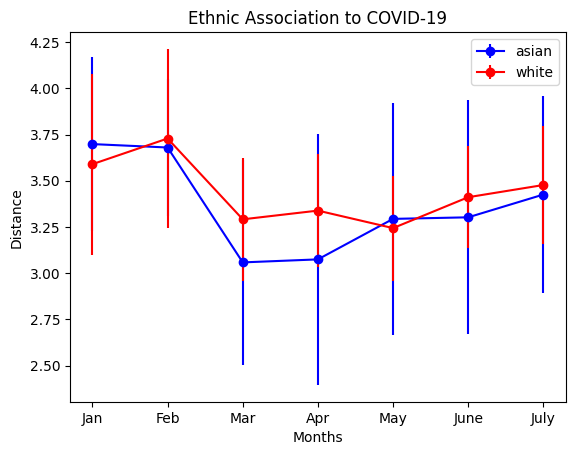

In [39]:
fig, ax = plt.subplots()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July']

ax.errorbar(x=months, y=np.mean(covidAsian, axis=1), yerr=np.sqrt(np.var(covidAsian,axis=1)), fmt='-o', color='blue', label='asian')
ax.errorbar(x=months, y=np.mean(covidWhite, axis=1), yerr=np.sqrt(np.var(covidWhite,axis=1)), fmt='-o', color='red', label='white')

ax.set_xlabel('Months')
ax.set_ylabel('Distance')
ax.set_title('Ethnic Association to COVID-19')
ax.legend()
plt.show()

We can see that in January and February we have a relatively similar association with both White and Asian ethnicities. After that month, we have more correlation with Asian ethnicities in March, April and May and then they are close together again.

### Hate Crime

In [40]:
# Bias with Asian vector
hateAsian_jan = np.linalg.norm(hateGroup_jan - asianEmb_jan, axis=1)
hateAsian_feb = np.linalg.norm(hateGroup_feb - asianEmb_feb, axis=1)
hateAsian_mar = np.linalg.norm(hateGroup_mar - asianEmb_mar, axis=1)
hateAsian_apr = np.linalg.norm(hateGroup_apr - asianEmb_apr, axis=1)
hateAsian_may = np.linalg.norm(hateGroup_may - asianEmb_may, axis=1)
hateAsian_june = np.linalg.norm(hateGroup_june - asianEmb_june, axis=1)
hateAsian_july = np.linalg.norm(hateGroup_july - asianEmb_july, axis=1)

In [41]:
hateAsian = np.array([hateAsian_jan, hateAsian_feb, hateAsian_mar, hateAsian_apr, hateAsian_may,
                     hateAsian_june, hateAsian_july])

In [42]:
# Average similarity 
np.mean(hateAsian, axis=1)

array([3.4793327, 3.41708  , 2.7586613, 2.98313  , 3.136766 , 3.3082452,
       3.1560411], dtype=float32)

In [43]:
# Deviation between months 
np.sqrt(np.var(hateAsian,axis=1))

array([0.57973963, 0.4059468 , 0.5991898 , 0.67382544, 0.64104056,
       0.6246212 , 0.5793626 ], dtype=float32)

In [44]:
# Bias with White vector
hateWhite_jan = np.linalg.norm(hateGroup_jan - whiteEmb_jan, axis=1)
hateWhite_feb = np.linalg.norm(hateGroup_feb - whiteEmb_feb, axis=1)
hateWhite_mar = np.linalg.norm(hateGroup_mar - whiteEmb_mar, axis=1)
hateWhite_apr = np.linalg.norm(hateGroup_apr - whiteEmb_apr, axis=1)
hateWhite_may = np.linalg.norm(hateGroup_may - whiteEmb_may, axis=1)
hateWhite_june = np.linalg.norm(hateGroup_june - whiteEmb_june, axis=1)
hateWhite_july = np.linalg.norm(hateGroup_july - whiteEmb_july, axis=1)

In [45]:
hateWhite = np.array([hateWhite_jan, hateWhite_feb, hateWhite_mar, hateWhite_apr, hateWhite_may,
                     hateWhite_june, hateWhite_july])

In [46]:
# Average similarity 
np.mean(hateWhite, axis=1)

array([3.1847835, 3.3664594, 3.0998676, 3.2514756, 3.0725052, 3.274994 ,
       3.2137146], dtype=float32)

In [47]:
# Deviation between months 
np.sqrt(np.var(hateWhite,axis=1))

array([0.60878617, 0.5761337 , 0.3733754 , 0.31762818, 0.31600675,
       0.27008855, 0.32199043], dtype=float32)

#### Plot

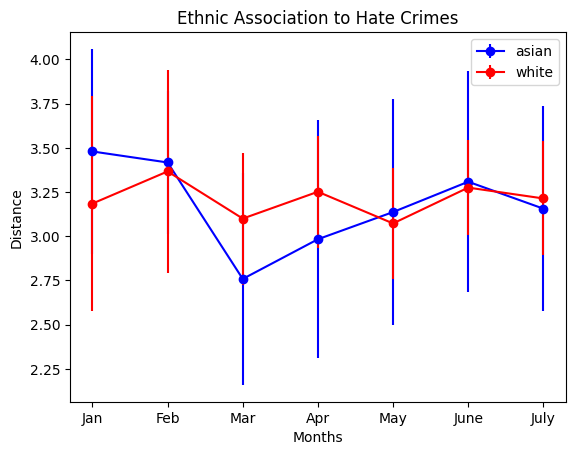

In [48]:
fig, ax = plt.subplots()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July']

ax.errorbar(x=months, y=np.mean(hateAsian, axis=1), yerr=np.sqrt(np.var(hateAsian,axis=1)), fmt='-o', color='blue', label='asian')
ax.errorbar(x=months, y=np.mean(hateWhite, axis=1), yerr=np.sqrt(np.var(hateWhite,axis=1)), fmt='-o', color='red', label='white')

ax.set_xlabel('Months')
ax.set_ylabel('Distance')
ax.set_title('Ethnic Association to Hate Crimes')
ax.legend()
plt.show()

We can see that in January and February we have that the association with Asian ethnicities is less than White last names. We have a bias towards Asian ethnicities uring March and April and then the associations are close together again.

### Outsider Adjectives

In [49]:
# Bias with Asian vector
outsiderAsian_jan = np.linalg.norm(outsiderGroup_jan - asianEmb_jan, axis=1)
outsiderAsian_feb = np.linalg.norm(outsiderGroup_feb - asianEmb_feb, axis=1)
outsiderAsian_mar = np.linalg.norm(outsiderGroup_mar - asianEmb_mar, axis=1)
outsiderAsian_apr = np.linalg.norm(outsiderGroup_apr - asianEmb_apr, axis=1)
outsiderAsian_may = np.linalg.norm(outsiderGroup_may - asianEmb_may, axis=1)
outsiderAsian_june = np.linalg.norm(outsiderGroup_june - asianEmb_june, axis=1)
outsiderAsian_july = np.linalg.norm(outsiderGroup_july - asianEmb_july, axis=1)

In [50]:
outsiderAsian = np.array([outsiderAsian_jan, outsiderAsian_feb, outsiderAsian_mar, outsiderAsian_apr, outsiderAsian_may, 
                         outsiderAsian_june, outsiderAsian_july])

In [51]:
# Averages similarity
np.mean(outsiderAsian, axis=1)

array([3.3639512, 3.2103155, 2.5718584, 2.5648553, 2.7840624, 2.7198992,
       2.767997 ], dtype=float32)

In [52]:
# Deviation between months 
np.sqrt(np.var(outsiderAsian,axis=1))

array([0.55909884, 0.42743194, 0.6546907 , 0.81446815, 0.73987365,
       0.75221294, 0.6703318 ], dtype=float32)

In [53]:
# Bias with White vector
outsiderWhite_jan = np.linalg.norm(outsiderGroup_jan - whiteEmb_jan, axis=1)
outsiderWhite_feb = np.linalg.norm(outsiderGroup_feb - whiteEmb_feb, axis=1)
outsiderWhite_mar = np.linalg.norm(outsiderGroup_mar - whiteEmb_mar, axis=1)
outsiderWhite_apr = np.linalg.norm(outsiderGroup_apr - whiteEmb_apr, axis=1)
outsiderWhite_may = np.linalg.norm(outsiderGroup_may - whiteEmb_may, axis=1)
outsiderWhite_june = np.linalg.norm(outsiderGroup_june - whiteEmb_june, axis=1)
outsiderWhite_july = np.linalg.norm(outsiderGroup_july - whiteEmb_july, axis=1)

In [54]:
outsiderWhite = np.array([outsiderWhite_jan, outsiderWhite_feb, outsiderWhite_mar, outsiderWhite_apr, outsiderWhite_may,
                         outsiderWhite_june, outsiderWhite_july])

In [55]:
# Average similarity
np.mean(outsiderWhite, axis=1)

array([2.969418 , 3.148325 , 2.7762141, 2.7766104, 2.697166 , 2.7834876,
       2.8369112], dtype=float32)

In [56]:
# Deviation between months 
np.sqrt(np.var(outsiderWhite,axis=1))

array([0.6053276 , 0.57946587, 0.36563998, 0.31090057, 0.2618346 ,
       0.27354646, 0.34399945], dtype=float32)

#### Plots

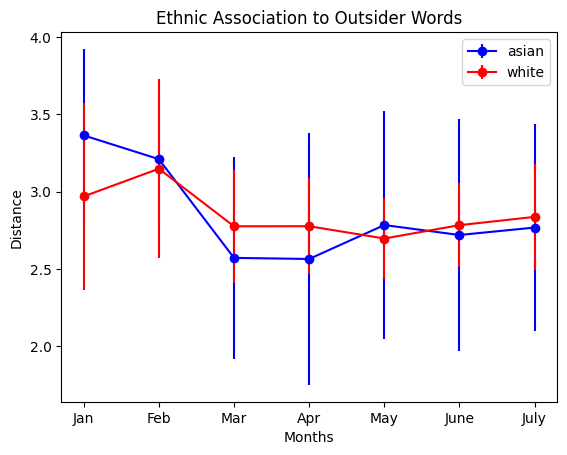

In [57]:
fig, ax = plt.subplots()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July']

ax.errorbar(x=months, y=np.mean(outsiderAsian, axis=1), yerr=np.sqrt(np.var(outsiderAsian,axis=1)), fmt='-o', color='blue', label='asian')
ax.errorbar(x=months, y=np.mean(outsiderWhite, axis=1), yerr=np.sqrt(np.var(outsiderWhite,axis=1)), fmt='-o', color='red', label='white')

ax.set_xlabel('Months')
ax.set_ylabel('Distance')
ax.set_title('Ethnic Association to Outsider Words')
ax.legend()
plt.show()

We can see that in January and February we have that the association with Asian ethnicities is less than White last names. We have a bias towards Asian ethnicities uring March and April and then the associations are close together again.

## Significance Test 

### Significance between Ethnicities

We run a two-sample significance test using the t-statistic since we have a smaller sample size to determine if there is a significanct difference between asian and white association over each month.

#### COVID-19

In [58]:
covidAsian.shape, covidWhite.shape

((7, 22), (7, 20))

In this case, we have data for 7 months with unequal sample sizes. This will be the case for all of our data since we will have 22 and 20 last names for each category.

In [59]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July']
for i in range(7):
    print(months[i])
    print(stats.ttest_ind(a=covidAsian[i], b=covidWhite[i], equal_var=False))

January
Ttest_indResult(statistic=0.7150307155450487, pvalue=0.4788270207518023)
February
Ttest_indResult(statistic=-0.35483839162744213, pvalue=0.7248207421456148)
March
Ttest_indResult(statistic=-1.6281470238482953, pvalue=0.11246995680659151)
April
Ttest_indResult(statistic=-1.6105345663633586, pvalue=0.11784329829633974)
May
Ttest_indResult(statistic=0.32988241316574357, pvalue=0.7437854383713195)
June
Ttest_indResult(statistic=-0.715582088021618, pvalue=0.4799066287858613)
July
Ttest_indResult(statistic=-0.3745653661675018, pvalue=0.7102511089803493)


Our null hypothesis is that the two means are equal, i.e. the average association with the categorical words is the same for both white and asian last names. From our results, we see that we have high p-values for each month so we do not have significant evidence to reject the null hypothesis.

#### Hate Crime

In [60]:
hateAsian.shape, hateWhite.shape

((7, 22), (7, 20))

In [61]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July']
for i in range(7):
    print(months[i])
    print(stats.ttest_ind(a=hateAsian[i], b=hateWhite[i], equal_var=False))

January
Ttest_indResult(statistic=1.5630624958637174, pvalue=0.12608950968709864)
February
Ttest_indResult(statistic=0.3181400693047594, pvalue=0.7523393907625923)
March
Ttest_indResult(statistic=-2.182832990940389, pvalue=0.03572013926955761)
April
Ttest_indResult(statistic=-1.6351941467879638, pvalue=0.11227365073991678)
May
Ttest_indResult(statistic=0.4078583376948187, pvalue=0.6861541844794175)
June
Ttest_indResult(statistic=0.22208023483562167, pvalue=0.8257974814138223)
July
Ttest_indResult(statistic=-0.39387431927570654, pvalue=0.6961717570312682)


Our null hypothesis is that the two means are equal, i.e. the average association with the categorical words is the same for both white and asian last names. From our results, we do have a significant difference in March between the two groups. However, for the remaining groups, we see that we have high p-values for each month so we do not have significant evidence to reject the null hypothesis.

#### Outsider Adjectives

In [62]:
outsiderAsian.shape, outsiderWhite.shape

((7, 22), (7, 20))

In [63]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July']
for i in range(7):
    print(months[i])
    print(stats.ttest_ind(a=outsiderAsian[i], b=outsiderWhite[i], equal_var=False))

January
Ttest_indResult(statistic=2.134306917562838, pvalue=0.03920006986676056)
February
Ttest_indResult(statistic=0.3817234734890059, pvalue=0.7049939972205213)
March
Ttest_indResult(statistic=-1.233502280237086, pvalue=0.2259566409374488)
April
Ttest_indResult(statistic=-1.1057166555552458, pvalue=0.27842219705277416)
May
Ttest_indResult(statistic=0.5044316840193946, pvalue=0.618103239051494)
June
Ttest_indResult(statistic=-0.3618452570136875, pvalue=0.7202893217348108)
July
Ttest_indResult(statistic=-0.4146226575357563, pvalue=0.6811840567751939)


Our null hypothesis is that the two means are equal, i.e. the average association with the categorical words is the same for both white and asian last names. From our results, we see that in January, there is significant difference between the means of the two groups. However, for teh remaining months, we see that we have high p-values for each month so we do not have significant evidence to reject the null hypothesis.

### Test between Time Periods

Another test that we can run is to see if there were any significant changes in the ethnic association over each month. For this task, we will use Pearson correlation between the time periods to see if the correlation between average associations changes.

#### COVID

In [64]:
# Correlation amongst every time period for 22 last names
covidAsian_df = pd.DataFrame(covidAsian).T
covidAsian_df.columns=months
covidAsian_df.head()

,January,February,March,April,May,June,July
0,3.099270,3.148051,2.840457,2.696455,2.618687,2.882559,3.066419
1,3.773228,3.794695,2.886319,2.922389,3.128277,3.061589,3.471613
2,3.289669,3.424811,3.087544,2.175128,2.467941,2.580766,2.626137
3,2.635523,3.263011,2.558371,2.464803,2.349308,2.994072,3.079542
4,3.461327,3.785936,3.041044,3.102805,3.018506,2.845406,2.832428


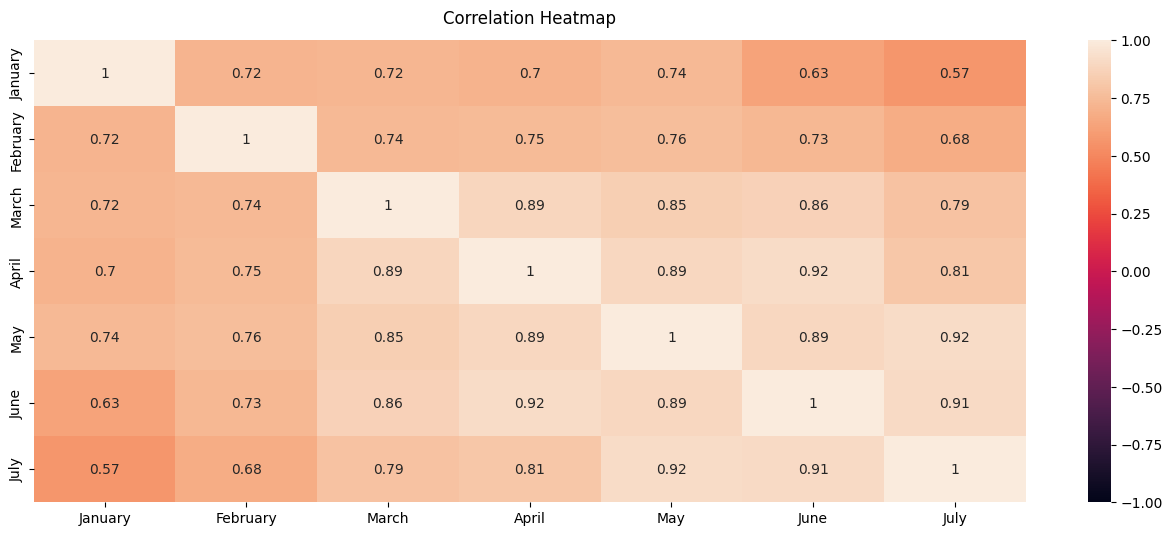

In [65]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(covidAsian_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We are interested in looking at the consequent months rather than the correlation between let's say January and July so the squares adjacent to the diagonals. We see high correlation between each of the consequent months (i.e. April and May is 0.89) which means there does seem to be a relationship between each of the consequent months. We also only see positive correlations between the values in each month.

In [66]:
# Correlation amongst every time period for 22 last names
covidWhite_df = pd.DataFrame(covidWhite).T
covidWhite_df.columns=months
covidWhite_df.head()

,January,February,March,April,May,June,July
0,2.906897,3.446319,3.145874,3.530815,3.251075,3.807522,3.140053
1,3.328882,3.637108,3.053824,3.643656,3.075751,2.893278,3.168540
2,3.790733,3.884623,3.280673,3.191821,3.610791,3.542467,3.344338
3,2.635354,3.613898,2.717661,2.949379,3.094913,3.467004,3.105401
4,3.507291,3.510739,3.327578,3.654578,3.486538,3.334854,3.611140


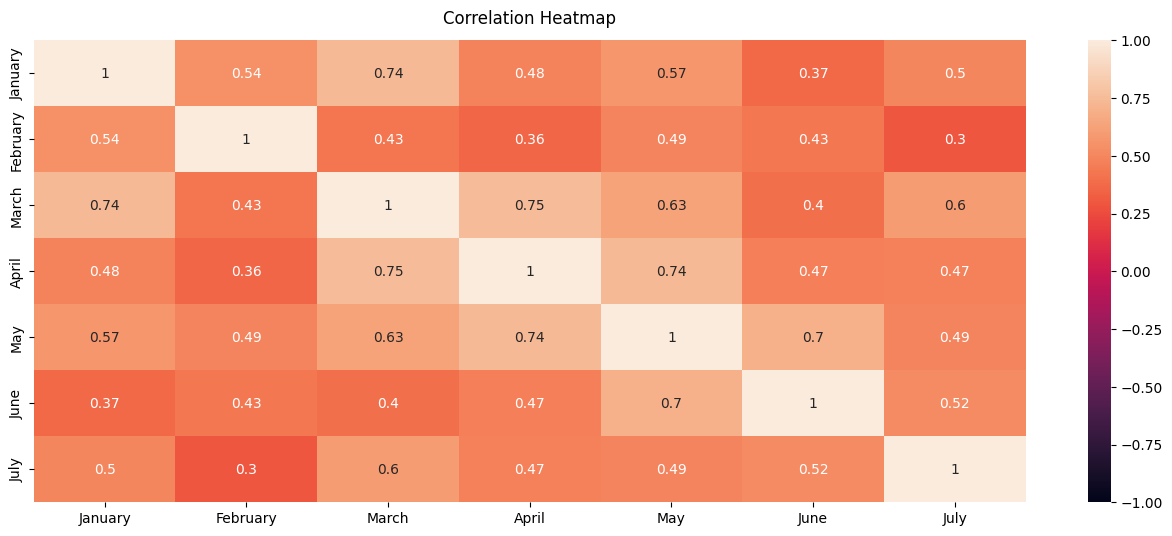

In [67]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(covidWhite_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

For the white last names, we see a lot more lower values of correlation. The only block we see is between February and March which may have a significant change but would need to be tested. 

Next, we test the significance of these correlations for both White and Asian ethnicities.

In [68]:
# Initialize dataframe and lists
covid_sig = pd.DataFrame(index=months)
asian_rvals = []
asian_pvals = []
white_rvals = []
white_pvals = []
for i in range(6):
    r, pval = stats.pearsonr(covidAsian[i], covidAsian[i+1])
    asian_rvals.append(r)
    asian_pvals.append(pval)
    r, pval = stats.pearsonr(covidWhite[i], covidWhite[i+1])
    white_rvals.append(r)
    white_pvals.append(pval)
                 
asian_rvals.append(np.NaN)
asian_pvals.append(np.NaN)
white_rvals.append(np.NaN)
white_pvals.append(np.NaN)

# Append to DataFrame
covid_sig['asian_r'] = asian_rvals
covid_sig['asian_pval'] = asian_pvals
covid_sig['white_r'] = white_rvals
covid_sig['white_pval'] = white_pvals

In [69]:
covid_sig

,asian_r,asian_pval,white_r,white_pval
January,0.715156,1.834128e-04,0.540963,0.013779
February,0.740158,8.214217e-05,0.425926,0.061141
March,0.885731,4.241464e-08,0.752081,0.000131
April,0.893638,2.142050e-08,0.741982,0.000180
May,0.893179,2.231825e-08,0.698951,0.000606
June,0.910794,3.968811e-09,0.520082,0.018742
July,NaN,NaN,NaN,NaN


Our last row is NaN because there is no consqeuent month to compare it to. We notice that we do have significant change between every month for both groups with the exception of February to March for white last names.

#### Hate Crime

In [70]:
# Correlation amongst every time period for 22 last names
hateAsian_df = pd.DataFrame(hateAsian).T
hateAsian_df.columns=months
hateAsian_df.head()

,January,February,March,April,May,June,July
0,2.609257,3.037705,2.402324,2.557792,2.683625,2.691812,2.717157
1,3.874656,3.437334,2.747546,2.845422,3.011846,3.058110,3.103341
2,3.264831,3.233423,2.451895,2.032479,2.081019,2.501397,2.391686
3,1.759149,2.542013,2.055354,2.134451,2.224958,2.975224,2.516153
4,3.377775,3.658855,2.816571,3.258983,2.679566,3.006543,2.854990


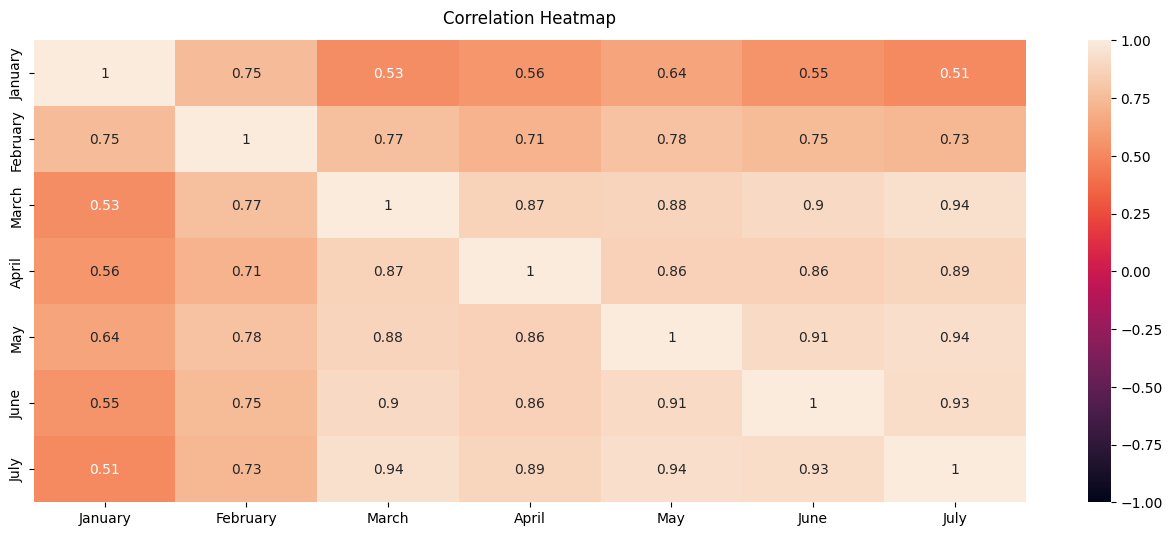

In [71]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(hateAsian_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We see a high correlation again betwen the consequent months with the exception of June and July which seems to have a relatively low correlation of 0.21.

In [72]:
# Correlation amongst every time period for 22 last names
hateWhite_df = pd.DataFrame(hateWhite).T
hateWhite_df.columns=months
hateWhite_df.head()

,January,February,March,April,May,June,July
0,2.588114,2.979226,3.231030,3.450989,3.143591,3.579146,3.016562
1,2.693465,3.111590,3.005841,3.332504,2.917048,2.910576,3.089419
2,3.252495,3.449212,3.093739,2.978181,3.426399,3.243182,2.740483
3,1.970607,3.594336,2.254447,2.990056,3.089893,3.293398,2.827268
4,2.953469,2.802194,2.930726,3.493698,2.904577,2.916143,3.107361


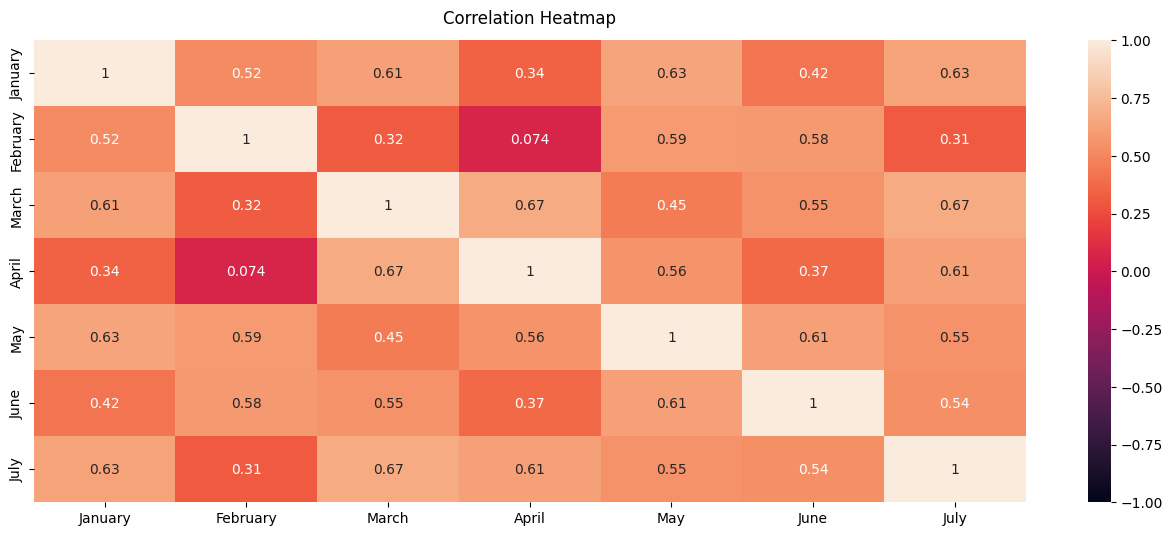

In [73]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(hateWhite_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We see similar results for White last names where we have a lower correlation for most values in comparison to the COVID results. Next, we test the significance of these correlations for both White and Asian ethnicities.

In [74]:
# Initialize dataframe and lists
hate_sig = pd.DataFrame(index=months)
asian_rvals = []
asian_pvals = []
white_rvals = []
white_pvals = []
for i in range(6):
    r, pval = stats.pearsonr(hateAsian[i], hateAsian[i+1])
    asian_rvals.append(r)
    asian_pvals.append(pval)
    r, pval = stats.pearsonr(hateWhite[i], hateWhite[i+1])
    white_rvals.append(r)
    white_pvals.append(pval)
                 
asian_rvals.append(np.NaN)
asian_pvals.append(np.NaN)
white_rvals.append(np.NaN)
white_pvals.append(np.NaN)

# Append to DataFrame
hate_sig['asian_r'] = asian_rvals
hate_sig['asian_pval'] = asian_pvals
hate_sig['white_r'] = white_rvals
hate_sig['white_pval'] = white_pvals

In [75]:
hate_sig

,asian_r,asian_pval,white_r,white_pval
January,0.754886,4.902361e-05,0.517522,0.019437
February,0.769379,2.846441e-05,0.315106,0.175981
March,0.874087,1.064479e-07,0.667120,0.001313
April,0.863497,2.280050e-07,0.556429,0.010835
May,0.908326,5.159865e-09,0.609986,0.004292
June,0.926548,6.078376e-10,0.537272,0.014569
July,NaN,NaN,NaN,NaN


We see that we have significant changes in correlation between each month for asian last names. For white last names, with an alpha=0.05, we have significance again for every month except February to March.

#### Outsider Adjectives

In [76]:
# Correlation amongst every time period for 22 last names
outsiderAsian_df = pd.DataFrame(outsiderAsian).T
outsiderAsian_df.columns=months
outsiderAsian_df.head()

,January,February,March,April,May,June,July
0,2.489625,2.758095,2.026643,2.073057,2.293609,1.909981,2.227772
1,3.645569,3.279019,2.545356,2.721791,2.772625,2.463861,2.655161
2,3.326033,2.956798,2.401584,1.527659,1.518793,1.667044,2.017297
3,1.816027,2.467527,1.726852,1.596805,1.633272,2.237367,2.028942
4,3.298558,3.389847,2.482890,2.640912,2.250225,2.346240,2.142683


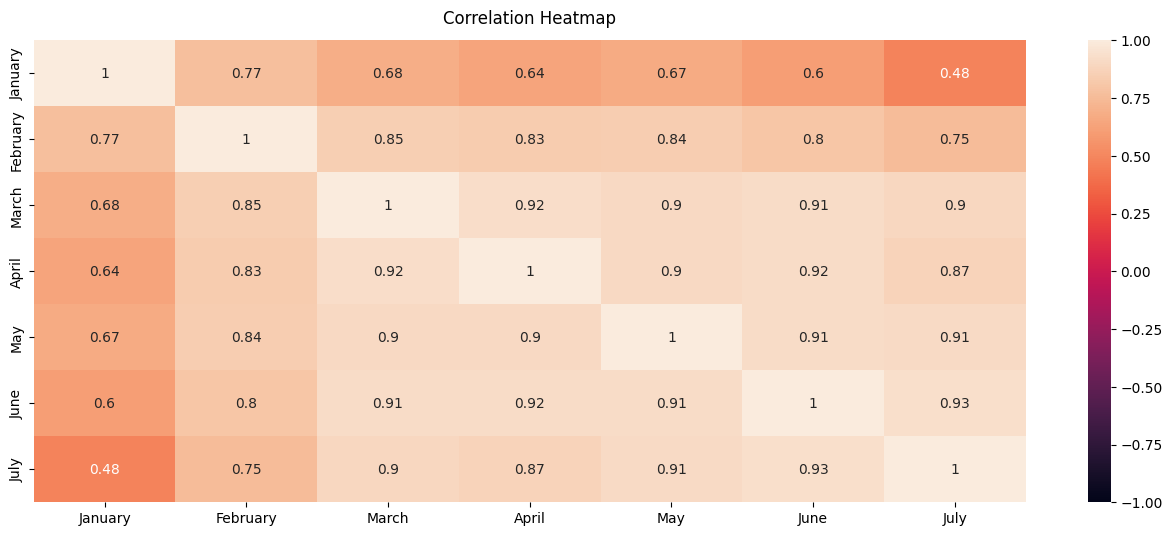

In [77]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(outsiderAsian_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We see a high correlation again betwen the consequent months for outsider adjectives.

In [78]:
# Correlation amongst every time period for 22 last names
outsiderWhite_df = pd.DataFrame(outsiderWhite).T
outsiderWhite_df.columns=months
outsiderWhite_df.head()

,January,February,March,April,May,June,July
0,2.312325,2.729949,2.806965,2.966280,2.797803,3.174365,2.531568
1,2.473217,2.965601,2.663718,2.897076,2.496209,2.343775,2.612929
2,3.137341,3.169597,2.613478,2.457273,2.940669,2.752540,2.621140
3,1.877909,3.280202,1.952056,2.586972,2.740305,2.668395,2.383551
4,2.696632,2.525705,2.569339,3.100036,2.618023,2.582612,2.701708


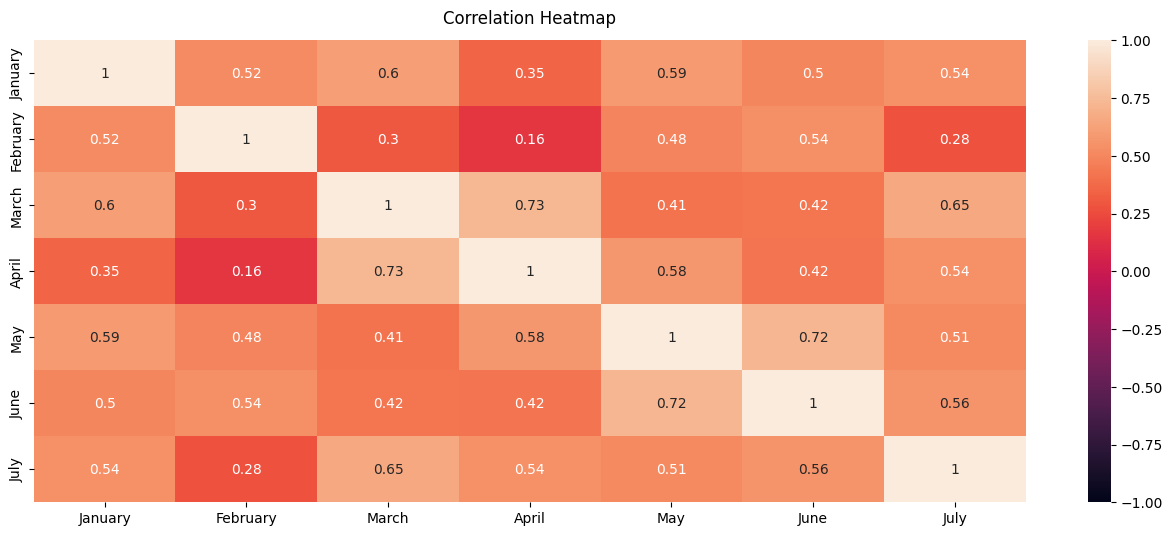

In [79]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(outsiderWhite_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We see that for white last names the correlations between each month seem to very low. Next, we test the significance of these correlations for both White and Asian ethnicities.

In [80]:
# Initialize dataframe and lists
outsider_sig = pd.DataFrame(index=months)
asian_rvals = []
asian_pvals = []
white_rvals = []
white_pvals = []
for i in range(6):
    r, pval = stats.pearsonr(outsiderAsian[i], outsiderAsian[i+1])
    asian_rvals.append(r)
    asian_pvals.append(pval)
    r, pval = stats.pearsonr(outsiderWhite[i], outsiderWhite[i+1])
    white_rvals.append(r)
    white_pvals.append(pval)
                 
asian_rvals.append(np.NaN)
asian_pvals.append(np.NaN)
white_rvals.append(np.NaN)
white_pvals.append(np.NaN)

# Append to DataFrame
outsider_sig['asian_r'] = asian_rvals
outsider_sig['asian_pval'] = asian_pvals
outsider_sig['white_r'] = white_rvals
outsider_sig['white_pval'] = white_pvals

In [81]:
outsider_sig

,asian_r,asian_pval,white_r,white_pval
January,0.765907,3.253599e-05,0.521008,0.018495
February,0.845719,7.177715e-07,0.302400,0.195014
March,0.923302,9.238437e-10,0.733078,0.000236
April,0.902697,9.141360e-09,0.576659,0.007776
May,0.914993,2.494756e-09,0.720438,0.000340
June,0.934021,2.145251e-10,0.556387,0.010843
July,NaN,NaN,NaN,NaN


We see that we have significant changes in correlation between each month for asian last names. For white last names, with an alpha=0.05, we have significance again for every month except February to March.

## Embedding Bias

We calculate the average embedding bias by computing the following for every category:
$$\mu_{\text{white}} - \mu_{\text{asian}}$$

where $\mu_{\text{white}}$ represents the average association of words in a category to white last names and $\mu_{\text{asian}}$ represents the average association of words in a category to asian last names.

### COVID 

In [82]:
# Average embedding bias
covid_bias = np.mean(covidAsian, axis=1) - np.mean(covidWhite, axis=1)

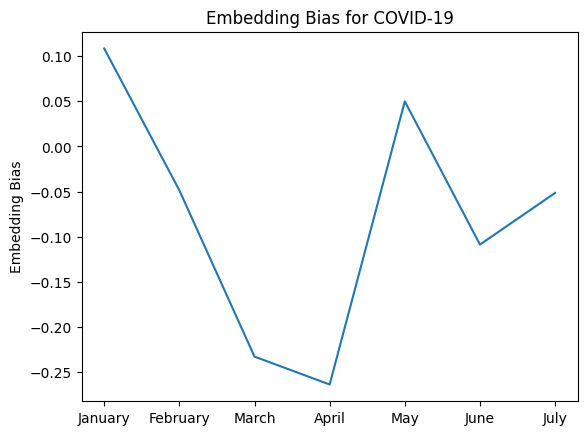

In [83]:
plt.plot(months, covid_bias)
plt.ylabel('Embedding Bias')
plt.title('Embedding Bias for COVID-19')

plt.show()

### Hate Crime Words 

In [84]:
# Average embedding bias
hate_bias = np.mean(hateAsian, axis=1) - np.mean(hateWhite, axis=1)

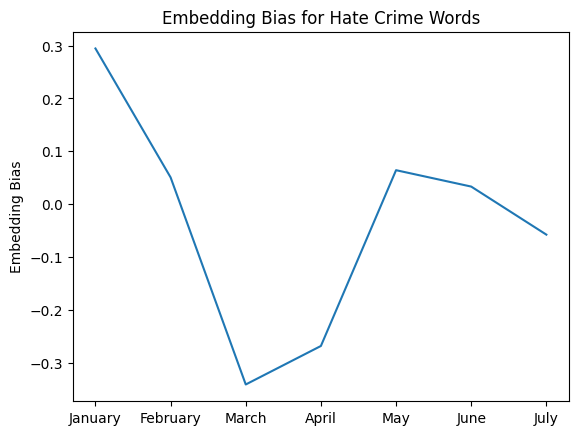

In [85]:
plt.plot(months, hate_bias)
plt.ylabel('Embedding Bias')
plt.title('Embedding Bias for Hate Crime Words')

plt.show()

### Outsider Adjectives

In [86]:
# Average embedding bias
outsider_bias = np.mean(outsiderAsian, axis=1) - np.mean(outsiderWhite, axis=1)

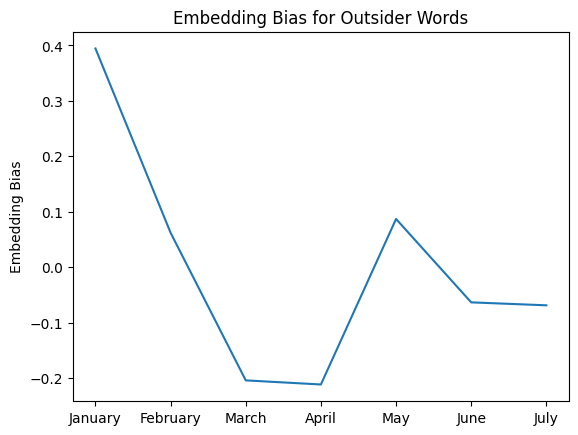

In [87]:
plt.plot(months, outsider_bias)
plt.ylabel('Embedding Bias')
plt.title('Embedding Bias for Outsider Words')

plt.show()

## Most Biased Last Names
Here we want to understand how biased each individual last name is in each of the categories. Let's take the top 5 most biased last names for each ethnicity and plot the associated average biases. This is to better understand if there were certain last names that were less biased and tuning out the bias.

### COVID

In [88]:
def top_k_words(arr, k, word_lst):
    indx = sorted(range(len(arr)), key = lambda sub: arr[sub])[:k]
    highest_bias = np.array(word_lst)[indx]
    
    return highest_bias, arr[indx] 

**Most Biased Last Names**

In [89]:
asian_covid_lst = []
for i in range(7):
    names, bias = top_k_words(covidAsian[i], 5, asian_last_names)
    print(names)
    asian_covid_lst.append(np.mean(bias))

['chu' 'tang' 'huang' 'chang' 'lin']
['chang' 'hu' 'chu' 'huang' 'wang']
['huang' 'liang' 'tang' 'chu' 'hu']
['cho' 'liang' 'wu' 'chu' 'hu']
['chu' 'cho' 'chang' 'liang' 'lin']
['hu' 'cho' 'liang' 'huang' 'wu']
['liang' 'cho' 'chung' 'hu' 'chang']


In [90]:
white_covid_lst = []
for i in range(7):
    names, bias = top_k_words(covidWhite[i], 5, white_last_names)
    print(names)
    white_covid_lst.append(np.mean(bias))

['thompson' 'harris' 'adams' 'clark' 'nelson']
['adams' 'wilson' 'taylor' 'allen' 'harris']
['wright' 'thompson' 'anderson' 'nelson' 'clark']
['wright' 'thompson' 'adams' 'clark' 'allen']
['adams' 'wright' 'wilson' 'williams' 'jackson']
['nelson' 'adams' 'allen' 'wright' 'davis']
['thompson' 'adams' 'harris' 'davis' 'nelson']


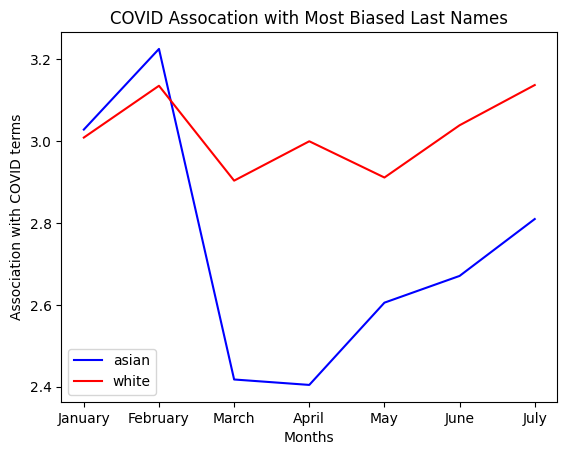

In [91]:
plt.plot(months, asian_covid_lst, color='blue', label='asian')
plt.plot(months, white_covid_lst, color='red', label='white')
plt.title('COVID Assocation with Most Biased Last Names')

plt.xlabel('Months')
plt.ylabel('Association with COVID terms')

plt.legend(loc='lower left')

plt.show()

We can see that with the most biased last names, we have that the average association with COVID terms is higher for asian last names instead over white last names with the exception of January and February. But the association increases over time with asian last names.

### Hate Crime

**Most Biased Last Names**

In [92]:
asian_hate_lst = []
for i in range(7):
    names, bias = top_k_words(hateAsian[i], 5, asian_last_names)
    print(names)
    asian_hate_lst.append(np.mean(bias))

['chu' 'tang' 'chang' 'lin' 'huang']
['chu' 'hu' 'lin' 'chang' 'liang']
['liang' 'chu' 'huang' 'hu' 'chang']
['cho' 'liang' 'chu' 'lin' 'tang']
['cho' 'chu' 'liang' 'lin' 'hu']
['cho' 'lin' 'huang' 'liang' 'chang']
['liang' 'cho' 'chu' 'hu' 'chang']


In [93]:
white_hate_lst = []
for i in range(7):
    names, bias = top_k_words(hateWhite[i], 5, white_last_names)
    print(names)
    white_hate_lst.append(np.mean(bias))

['thompson' 'adams' 'harris' 'nelson' 'taylor']
['adams' 'taylor' 'allen' 'moore' 'wilson']
['thompson' 'taylor' 'wright' 'jackson' 'allen']
['wright' 'clark' 'jackson' 'martin' 'robinson']
['adams' 'clark' 'wright' 'wilson' 'moore']
['nelson' 'moore' 'allen' 'williams' 'wilson']
['robinson' 'thompson' 'wright' 'williams' 'adams']


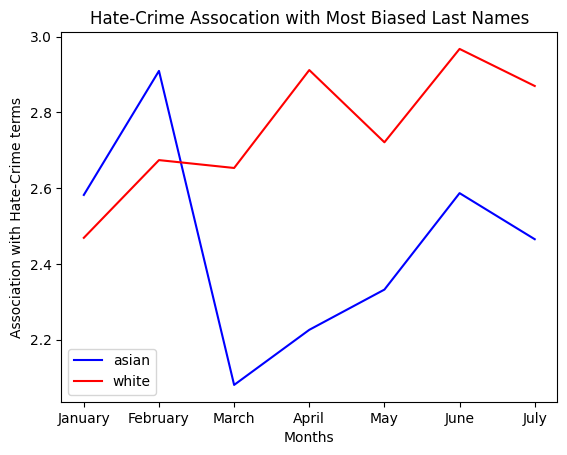

In [94]:
plt.plot(months, asian_hate_lst, color='blue', label='asian')
plt.plot(months, white_hate_lst, color='red', label='white')
plt.title('Hate-Crime Assocation with Most Biased Last Names')

plt.xlabel('Months')
plt.ylabel('Association with Hate-Crime terms')

plt.legend(loc='lower left')

plt.show()

We can see that with the most biased last names, we have that the average association with hate-crime terms is similar for January to March but after March it increases with asians in comparison to white last names. There is a steep drop in March which is interesting and may be correlated with the fact that AAPI was created in March 19, 2020.

### Outsider Adjectives

**Most Biased Last Names**

In [95]:
asian_outsider_lst = []
for i in range(7):
    names, bias = top_k_words(outsiderAsian[i], 5, asian_last_names)
    print(names)
    asian_outsider_lst.append(np.mean(bias))

['chu' 'tang' 'chang' 'huang' 'lin']
['chu' 'lin' 'chang' 'hu' 'huang']
['liang' 'chu' 'huang' 'lin' 'chang']
['liang' 'cho' 'chu' 'hu' 'tang']
['cho' 'chu' 'liang' 'lin' 'hu']
['cho' 'liang' 'huang' 'chang' 'hu']
['liang' 'cho' 'chu' 'hu' 'chung']


In [96]:
white_outsider_lst = []
for i in range(7):
    names, bias = top_k_words(outsiderWhite[i], 5, white_last_names)
    print(names)
    white_outsider_lst.append(np.mean(bias))

['thompson' 'adams' 'harris' 'nelson' 'taylor']
['adams' 'taylor' 'wilson' 'moore' 'allen']
['thompson' 'wright' 'taylor' 'moore' 'robinson']
['wright' 'robinson' 'williams' 'clark' 'anderson']
['adams' 'wright' 'wilson' 'nelson' 'jackson']
['nelson' 'allen' 'adams' 'wilson' 'wright']
['thompson' 'wright' 'williams' 'adams' 'harris']


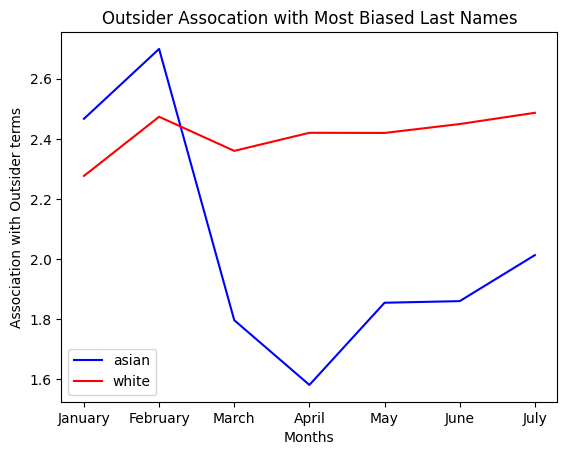

In [97]:
plt.plot(months, asian_outsider_lst, color='blue', label='asian')
plt.plot(months, white_outsider_lst, color='red', label='white')
plt.title('Outsider Assocation with Most Biased Last Names')

plt.xlabel('Months')
plt.ylabel('Association with Outsider terms')

plt.legend(loc='lower left')

plt.show()

We can see that with the most biased last names, we have that the average association with outsider adjectives is similar in January and February but after that it decreases quite a bit for white last names and increases for asian last names.

It would be interesting to conduct significant tests on this subset of data and see how it changes. However, given that we have a sample size of 5, our results could be rendered useless since our margin of error would be too high with 5 values. Hence, we keep a more qualitative conclusion and future work would be expanding this list of last names. 